# Validation / Quality Check After Cleaning

**Purpose:** Validate if cleaning had the intended impact

## 🔎 Steps:
- Compare text lengths before vs after

- Re-check class distribution

- Re-do word cloud / top tokens per class

- Check if vocabulary reduced (expected)

- Visualize word distribution and uniqueness

- Spot-check a few examples from each class

- Confirm: no empty or corrupted rows

✅ **Output:** Confirm that text is clean, balanced, and structured — ready for vectorization/modeling



## Imports

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
# Load the dictionary of words (NLTK corpus words)
import nltk
# nltk.download('words')
from nltk.corpus import words
from nltk.corpus import stopwords
from collections import Counter, defaultdict
from wordcloud import WordCloud
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

import warnings
warnings.filterwarnings('ignore')

## Load the Clean Dataset

In [4]:
DATA_PATH = os.path.join(os.getcwd(), "data")
# print(DATA_PATH)

In [5]:
train_df = pd.read_csv(os.path.join(DATA_PATH, "train_data_cleaned.csv"))
train_df.head()

,ArticleId,Text,Category,Clean_text,Label
0,1833,worldcom ex-boss launches defence lawyers defe...,business,worldcom ex bos launch defence lawyer defend f...,0
1,154,german business confidence slides german busin...,business,german business confidence slide german busine...,0
2,1101,bbc poll indicates economic gloom citizens in ...,business,bbc poll indicate economic gloom citizen major...,0
3,1976,lifestyle governs mobile choice faster bett...,tech,lifestyle governs mobile choice faster well fu...,1
4,917,enron bosses in $168m payout eighteen former e...,business,enron boss payout eighteen former enron direct...,0


## 1. Comparing Text Lengths before vs. after cleaning

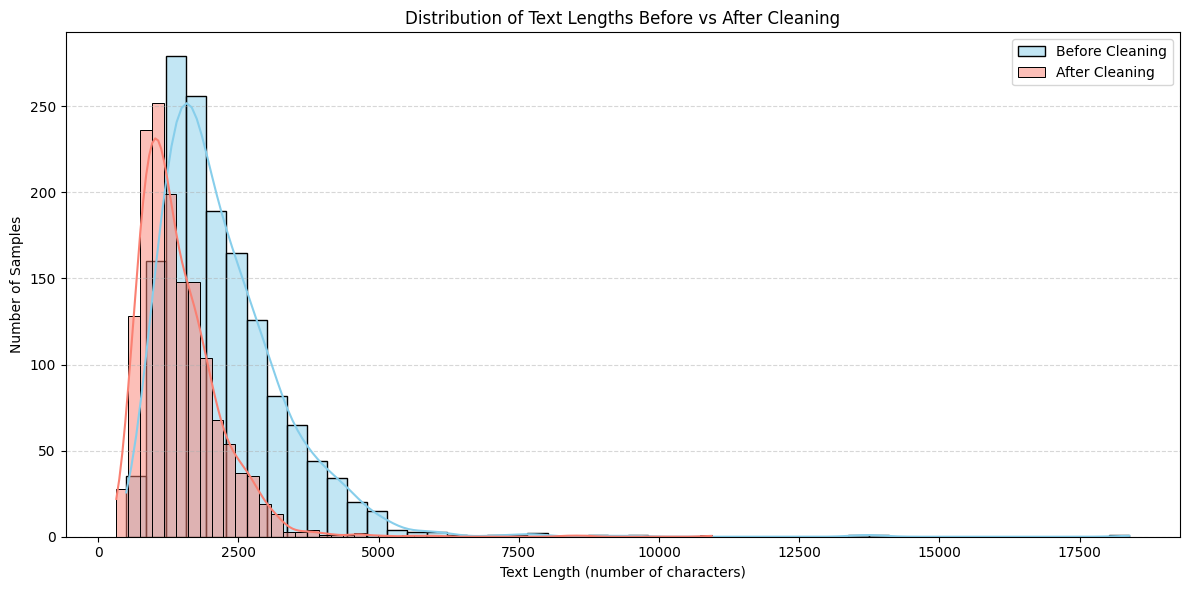

In [7]:
# Create length columns
train_df["Length_before"] = train_df["Text"].astype(str).apply(len)
train_df["Length_after"] = train_df["Clean_text"].astype(str).apply(len)

# Plot histograms side-by-side
plt.figure(figsize=(12, 6))
sns.histplot(train_df["Length_before"], bins=50, color='skyblue', label='Before Cleaning', kde=True)
sns.histplot(train_df["Length_after"], bins=50, color='salmon', label='After Cleaning', kde=True)
plt.title("Distribution of Text Lengths Before vs After Cleaning")
plt.xlabel("Text Length (number of characters)")
plt.ylabel("Number of Samples")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


- tokens got reduced (expected)
- removed puntuations, stopwords

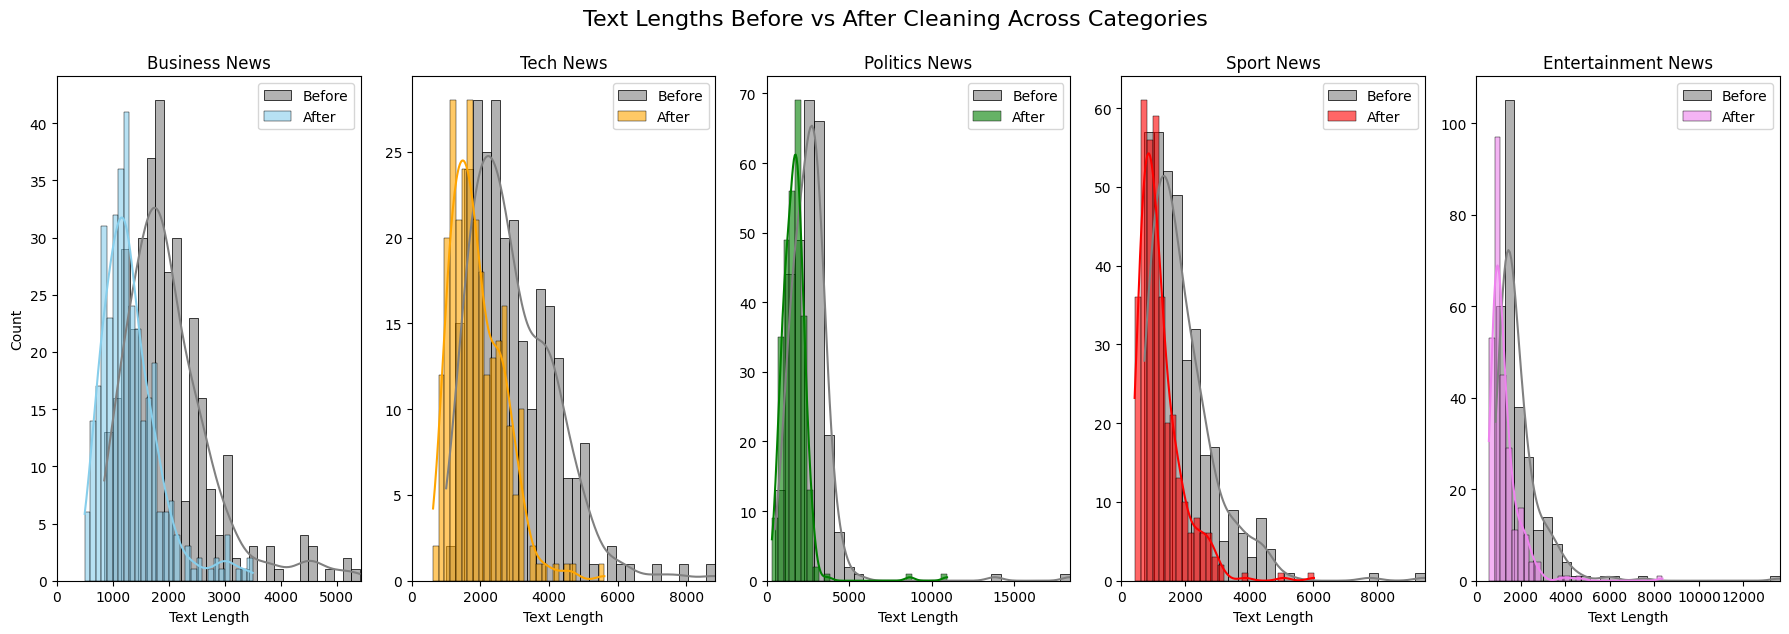

In [13]:
# Ensure length columns exist
train_df["Length_before"] = train_df["Text"].astype(str).apply(len)
train_df["Length_after"] = train_df["Clean_text"].astype(str).apply(len)

# Define categories and colors
categories = ['business', 'tech', 'politics', 'sport', 'entertainment']
colors = ['skyblue', 'orange', 'green', 'red', 'violet']

plt.figure(figsize=(18, 6))

for i, category in enumerate(categories):
    plt.subplot(1, 5, i + 1)
    
    # Filter category-specific data
    cat_data = train_df[train_df['Category'] == category]
    
    # Plot histograms
    sns.histplot(cat_data["Length_before"], label='Before', kde=True, color='gray', bins=30, alpha=0.6)
    sns.histplot(cat_data["Length_after"], label='After', kde=True, color=colors[i], bins=30, alpha=0.6)
    
    # Titles and labels
    plt.title(f"{category.capitalize()} News")
    plt.xlabel("Text Length")
    if i == 0:
        plt.ylabel("Count")
    else:
        plt.ylabel("")
    
    # Fix x-axis limits
    max_len = max(cat_data["Length_before"].max(), cat_data["Length_after"].max())
    plt.xlim(0, max_len + 20)
    
    # Add legend for each plot
    plt.legend()

plt.tight_layout()
plt.suptitle("Text Lengths Before vs After Cleaning Across Categories", fontsize=16, y=1.05)
plt.show()

In [10]:
print("Class counts:\n", class_counts)
print("\nClass percentages:\n", (class_counts / class_counts.sum() * 100).round(2))

Class counts:
 Category
sport            346
business         336
politics         274
entertainment    273
tech             261
Name: count, dtype: int64

Class percentages:
 Category
sport            23.22
business         22.55
politics         18.39
entertainment    18.32
tech             17.52
Name: count, dtype: float64


## 2. Word cloud / Top tokens per class

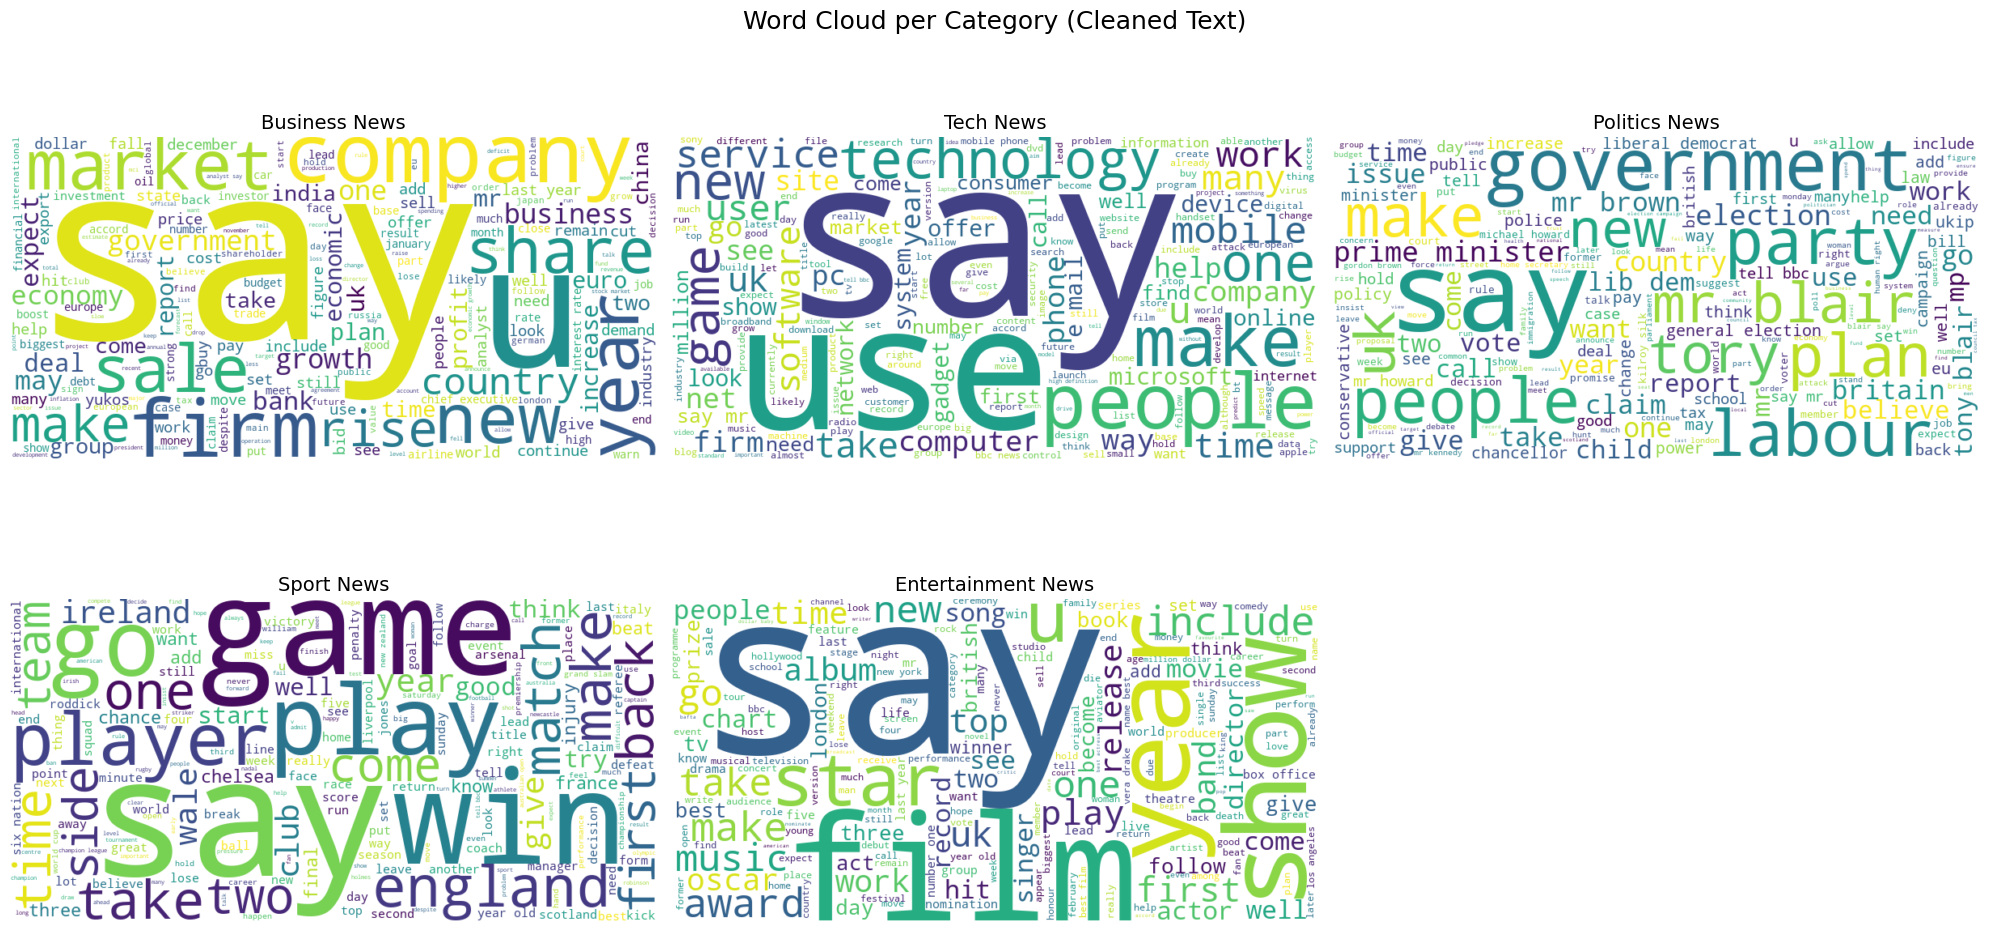

In [16]:
# Categories you want to plot
categories = ['business', 'tech', 'politics', 'sport', 'entertainment']

# Setup figure
plt.figure(figsize=(20, 10))

for i, category in enumerate(categories):
    # Combine all text in this category
    text = " ".join(train_df[train_df['Category'] == category]['Clean_text'].astype(str))
    
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)
    
    # Plot
    plt.subplot(2, 3, i + 1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"{category.capitalize()} News", fontsize=14)

plt.tight_layout()
plt.suptitle("Word Cloud per Category (Cleaned Text)", fontsize=18, y=1.02)
plt.show()


## 3. Check if vocabulary reduced (expected)

In [17]:
# Get all words from raw and cleaned text
raw_words = " ".join(train_df["Text"].astype(str)).split()
cleaned_words = " ".join(train_df["Clean_text"].astype(str)).split()

# Compute vocab sets
vocab_before = set(raw_words)
vocab_after = set(cleaned_words)

# Vocabulary sizes
vocab_size_before = len(vocab_before)
vocab_size_after = len(vocab_after)

# Reduction percentage
reduction = 100 * (vocab_size_before - vocab_size_after) / vocab_size_before

# Print results
print(f"Vocabulary Size Before Cleaning: {vocab_size_before}")
print(f"Vocabulary Size After Cleaning:  {vocab_size_after}")
print(f"Reduction in Vocabulary:         {reduction:.2f}%")


Vocabulary Size Before Cleaning: 35594
Vocabulary Size After Cleaning:  19238
Reduction in Vocabulary:         45.95%


## 4. Visualize word distribution and uniqueness

### 4.1 Get Word Frequencies from Cleaned Text

In [ ]:
# Tokenize all cleaned text
all_words = " ".join(train_df["Clean_text"].astype(str)).split()

# Count word frequencies
word_counts = Counter(all_words)

# Total unique words
total_unique_words = len(word_counts)
hapaxes = [word for word, count in word_counts.items() if count == 1]
num_hapaxes = len(hapaxes)

print(f"Total unique words: {total_unique_words}")
print(f"Words that appear only once (hapaxes): {num_hapaxes}")
print(f"Percentage of hapaxes: {num_hapaxes / total_unique_words * 100:.2f}%")

Total unique words: 19238
Words that appear only once (hapaxes): 7013
Percentage of hapaxes: 36.45%


### 4.2 Visualize Top 30 Most Frequent Words

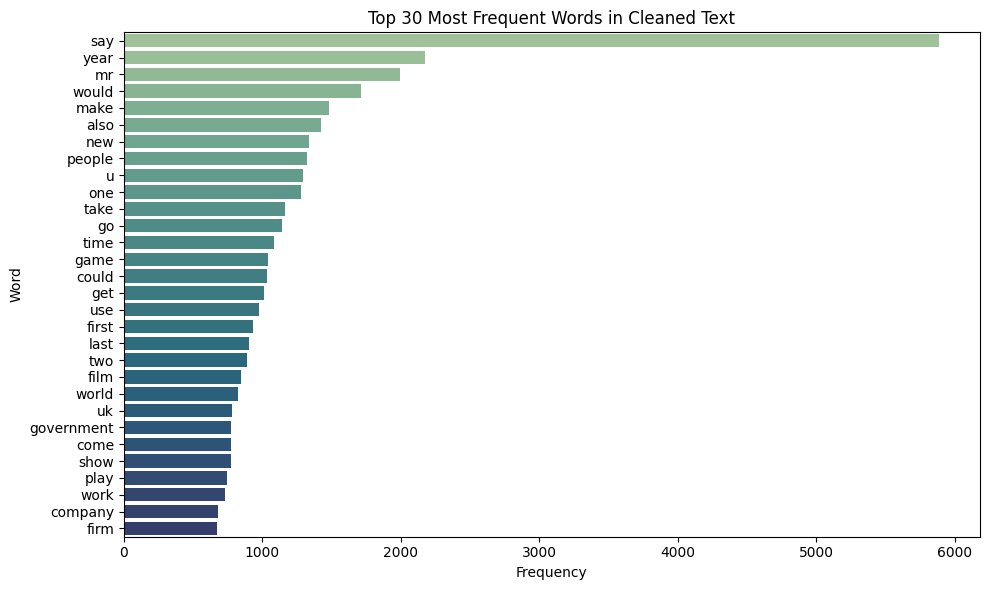

In [21]:
# Get top 30 frequent words
top_words = word_counts.most_common(30)
top_df = pd.DataFrame(top_words, columns=["Word", "Frequency"])

plt.figure(figsize=(10, 6))
sns.barplot(x="Frequency", y="Word", data=top_df, palette="crest")
plt.title("Top 30 Most Frequent Words in Cleaned Text")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.tight_layout()
plt.show()


### 4.3 Plot Word Frequency Distribution (Long Tail)

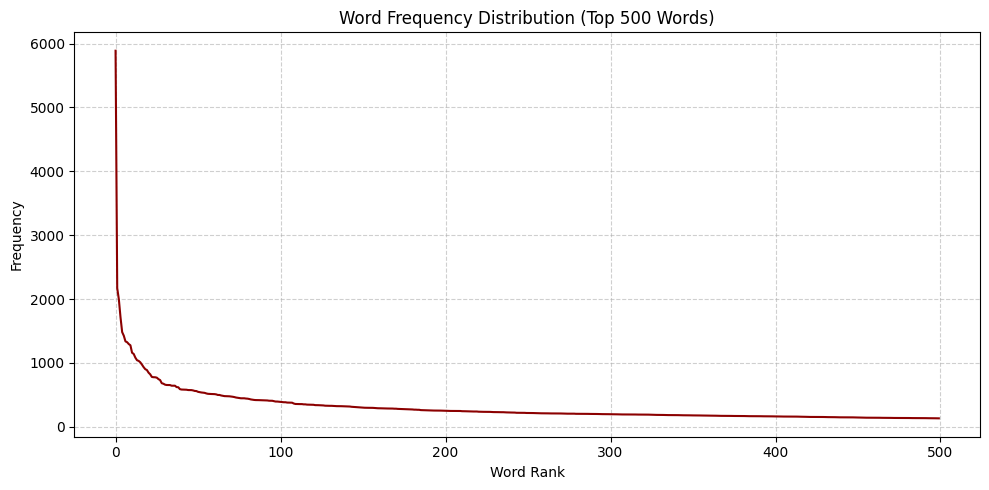

In [22]:
# Sort frequencies for distribution plot
freqs = sorted(word_counts.values(), reverse=True)

plt.figure(figsize=(10, 5))
plt.plot(freqs[:500], color='darkred')  # Top 500 for visibility
plt.title("Word Frequency Distribution (Top 500 Words)")
plt.xlabel("Word Rank")
plt.ylabel("Frequency")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## 5. Spot-check a few examples from each class

### 5.1 Spot-Check 3 Cleaned Texts per Category

In [23]:
# Number of examples per class to show
examples_per_class = 3

# Get unique categories
categories = train_df["Category"].unique()

# Loop through categories and display examples
for category in categories:
    print(f"\n=== Category: {category.upper()} ===")
    
    # Filter and sample
    examples = train_df[train_df["Category"] == category].sample(n=examples_per_class, random_state=42)
    
    for i, row in examples.iterrows():
        print(f"\n👉 Example {i+1}")
        print(f"Original: {row['Text'][:300]}")  # first 300 chars for readability
        print(f"Cleaned : {row['Clean_text'][:300]}")



=== Category: BUSINESS ===

👉 Example 322
Original: nasdaq planning $100m share sale the owner of the technology-dominated nasdaq stock index plans to sell shares to the public and list itself on the market it operates.  according to a registration document filed with the securities and exchange commission  nasdaq stock market plans to raise $100m (£
Cleaned : nasdaq plan share sale owner technology dominate nasdaq stock index plan sell share public list market operate accord registration document file security exchange commission nasdaq stock market plan raise sale observer see another step closer full public listing however nasdaq icon technology boom r

👉 Example 479
Original: india s deccan seals $1.8bn deal air deccan has ordered 30 airbus a320 planes in a $1.8bn (£931m) deal as india s first low-cost airline expands in the fast-growing domestic market.  air deccan was set up last year and wants to lure travellers away from the railway network and pricier rivals. the po
Cleaned :

## 6. Confirm: no empty or corrupted rows

### 6.1 Check for Empty or Corrupted Cleaned Text

In [25]:
# 1. Check for NaNs in cleaned column
null_cleaned = train_df["Clean_text"].isnull().sum()
print(f"🔍 Null entries in Clean_text: {null_cleaned}")

# 2. Check for empty or whitespace-only strings
empty_cleaned = train_df["Clean_text"].astype(str).str.strip().eq("").sum()
print(f"🔍 Empty or whitespace-only Clean_text: {empty_cleaned}")

# 3. Check for very short cleaned texts (e.g., less than 3 words)
short_cleaned = train_df["Clean_text"].astype(str).apply(lambda x: len(x.split()) < 3).sum()
print(f"🔍 Cleaned texts with fewer than 3 words: {short_cleaned}")

# 4. Check for missing or null labels
null_labels = train_df["Category"].isnull().sum()
print(f"🔍 Null values in Category column: {null_labels}")


🔍 Null entries in Clean_text: 0
🔍 Empty or whitespace-only Clean_text: 0
🔍 Cleaned texts with fewer than 3 words: 0
🔍 Null values in Category column: 0


### 6.2 Show Problematic Rows 

In [26]:
# Display rows with empty or very short cleaned text
problem_rows = train_df[
    train_df["Clean_text"].astype(str).str.strip().eq("") |
    train_df["Clean_text"].astype(str).apply(lambda x: len(x.split()) < 3)
]

print("\n⚠️ Problematic Rows:")
print(problem_rows[["Text", "Clean_text", "Category"]].head())



⚠️ Problematic Rows:
Empty DataFrame
Columns: [Text, Clean_text, Category]
Index: []


## Train Validation Splits

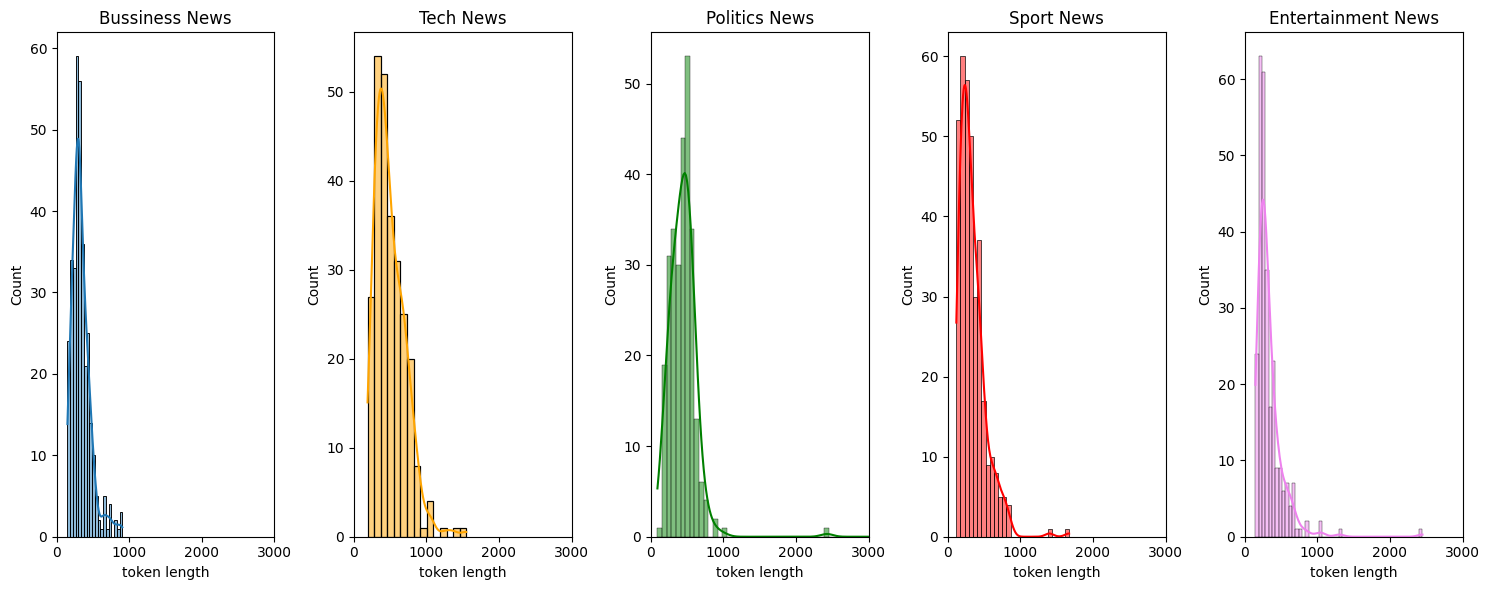

In [4]:
plt.subplots(1, 5, figsize=(15,6))
#bussiness
plt.subplot(151)
sns.histplot(data=train_df[train_df['Category'] == 'business'], x='token length', kde=True)
plt.xlim(0,3000)
plt.title('Bussiness News')

#tech
plt.subplot(152)
sns.histplot(data=train_df[train_df['Category'] == 'tech'], x='token length', kde=True, color='orange')
plt.xlim(0,3000)
plt.title('Tech News')

#politics
plt.subplot(153)
sns.histplot(data=train_df[train_df['Category'] == 'politics'], x='token length', kde=True, color='green')
plt.xlim(0,3000)
plt.title('Politics News')

#sport
plt.subplot(154)
sns.histplot(data=train_df[train_df['Category'] == 'sport'], x='token length', kde=True, color='red')
plt.xlim(0,3000)
plt.title('Sport News')

#entertainment
plt.subplot(155)
sns.histplot(data=train_df[train_df['Category'] == 'entertainment'], x='token length', kde=True, color='violet')
plt.xlim(0,3000)
plt.title('Entertainment News')

plt.tight_layout()
plt.savefig('plots/token_length.png')
plt.show();

## Stratify Splitting

splitting data based on `Category` and the distribution of tokens per example across the category to avoid bias of token length and distribution of words.

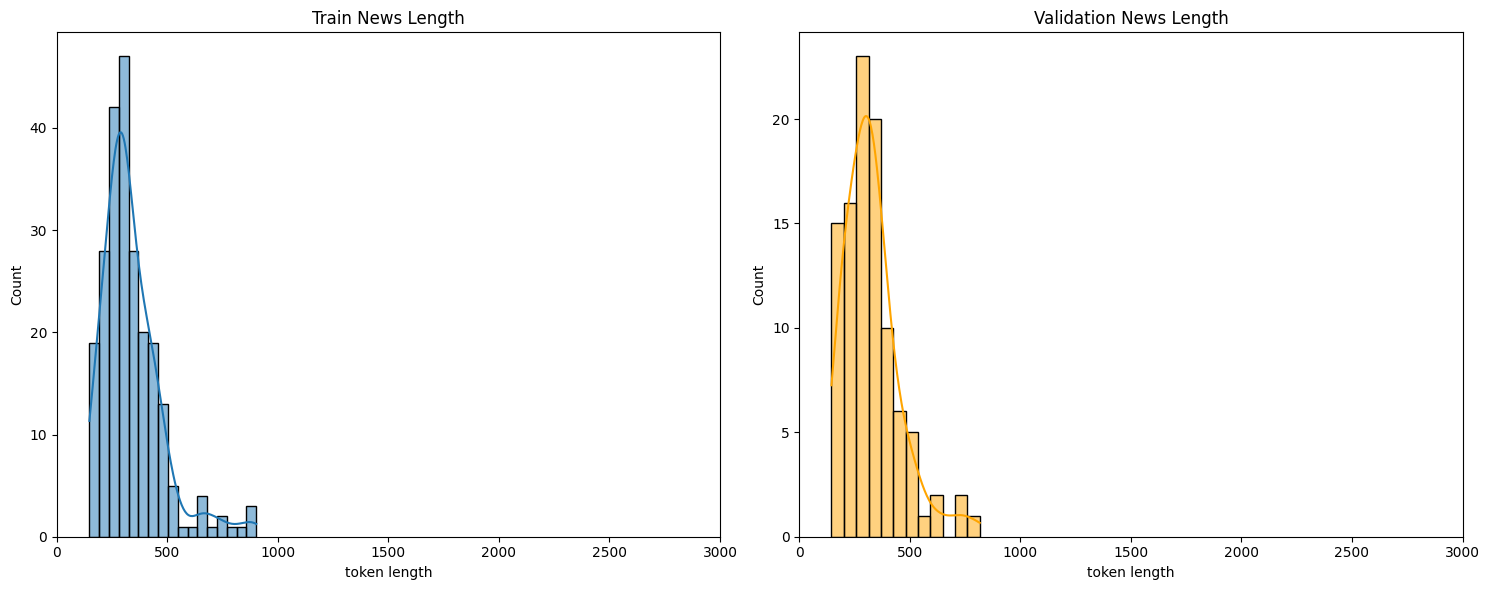

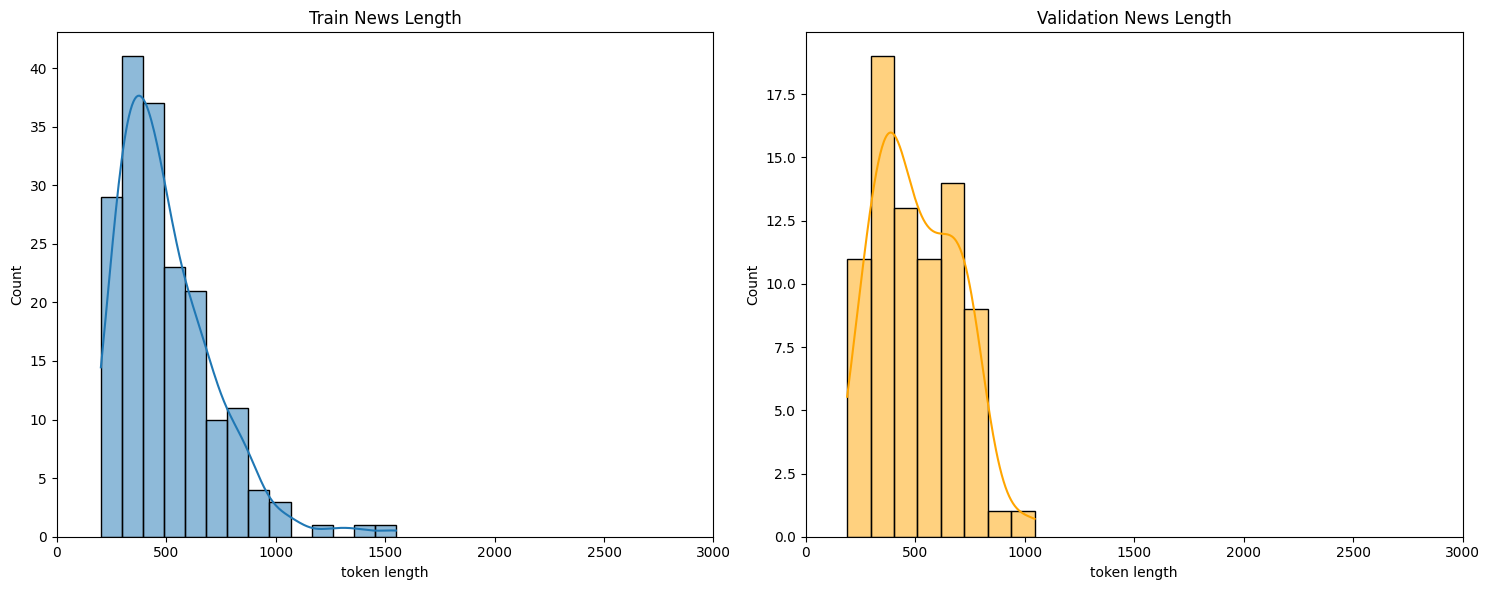

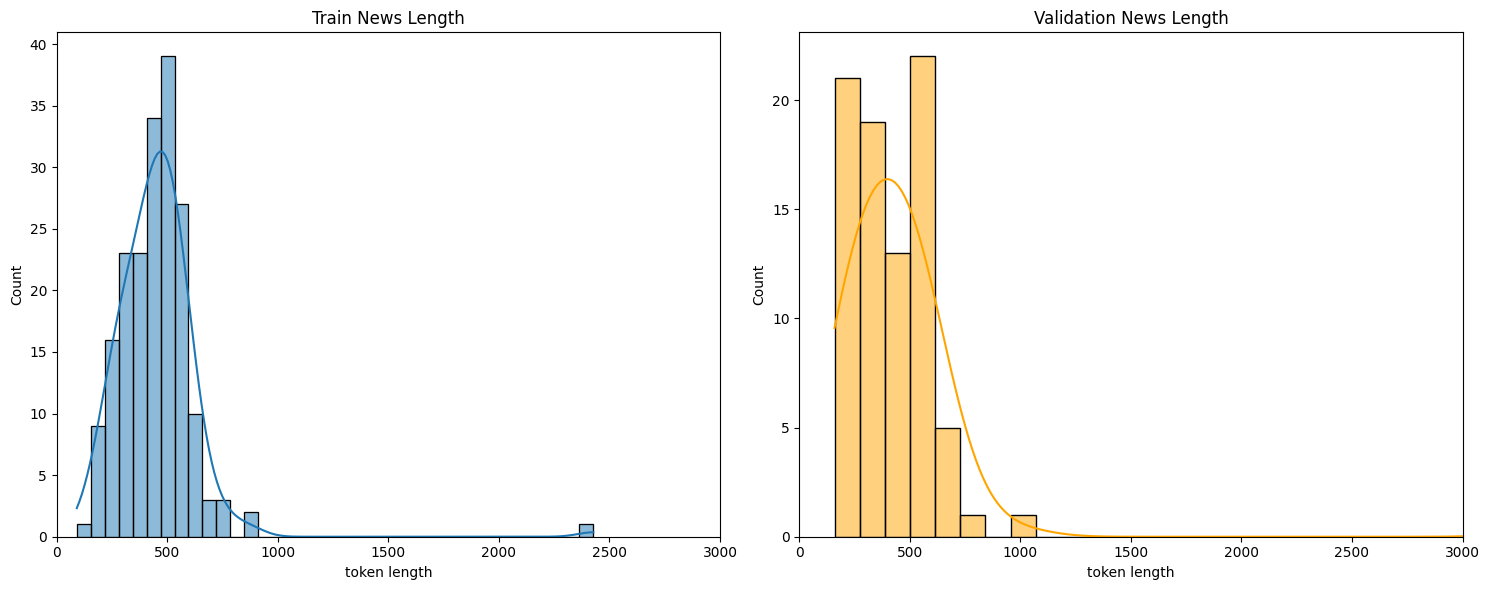

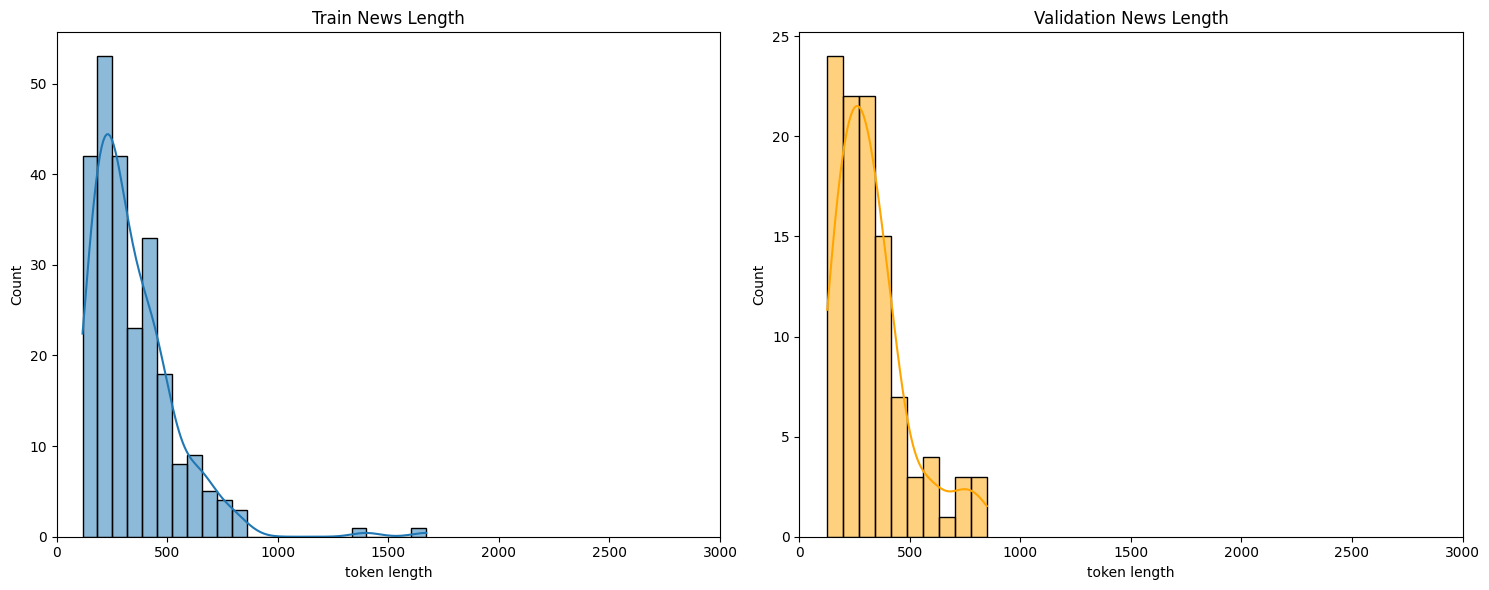

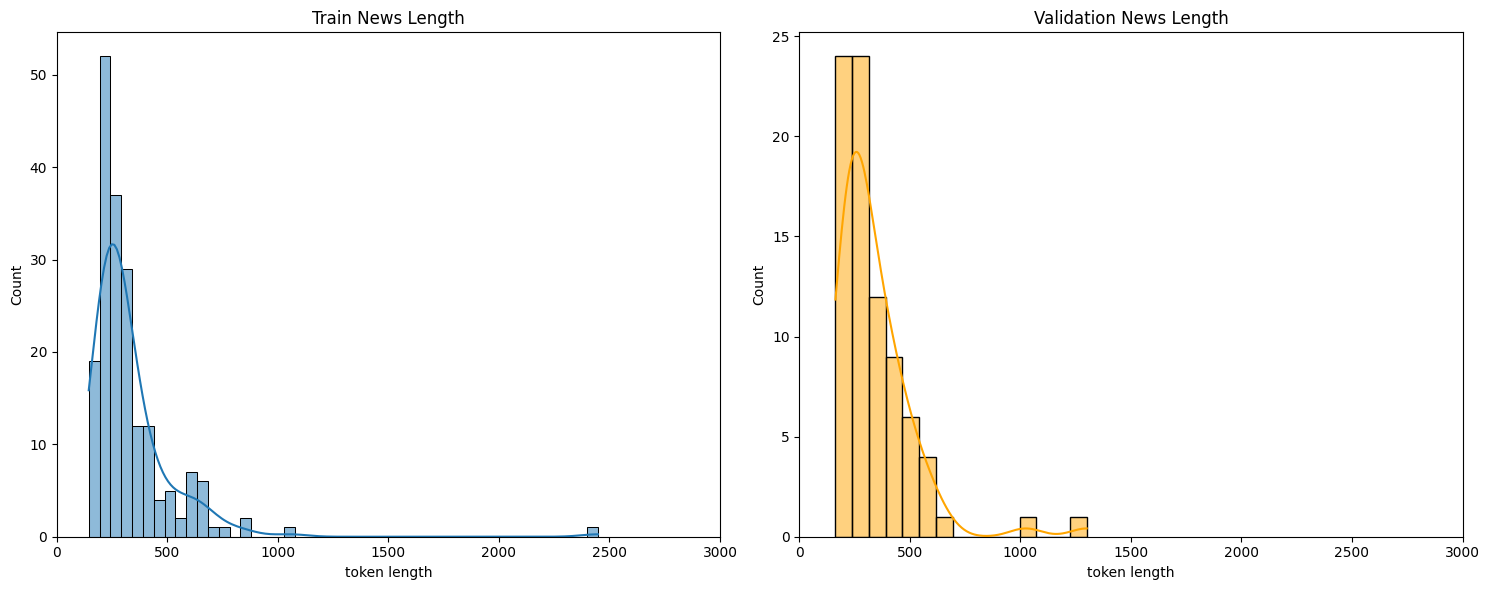

In [5]:
train_data = pd.DataFrame()
val_data = pd.DataFrame()
for category in train_df["Category"].unique():
    
    # random sapling
    train, val = train_test_split(train_df[train_df['Category'] == category], test_size=0.3, 
                                  random_state=1998, 
                                  shuffle=True)

    plt.subplots(1, 2, figsize=(15,6))
    #train
    plt.subplot(121)
    sns.histplot(data=train, x='token length', kde=True)
    plt.xlim(0,3000)
    plt.title('Train News Length')

    #val
    plt.subplot(122)
    sns.histplot(data=val, x='token length', kde=True, color='orange')
    plt.xlim(0,3000)
    plt.title('Validation News Length')
    
    plt.tight_layout()
    plt.show();

    train_data = pd.concat([train_data, train], axis=0)
    val_data = pd.concat([val_data, val], axis=0)

In [6]:
print(f"Train: {train_data.shape}")
print(f"Val  : {val_data.shape}")

Train: (1041, 9)
Val  : (449, 9)


In [7]:
train_data["Label"].value_counts(normalize=True)

Label
3    0.232469
0    0.225744
2    0.183477
4    0.183477
1    0.174832
Name: proportion, dtype: float64

In [8]:
val_data["Label"].value_counts(normalize=True)

Label
3    0.231626
0    0.224944
2    0.184855
4    0.182628
1    0.175947
Name: proportion, dtype: float64

## Dictionary Vs OOV words

In [9]:
# Flatten the list of tokens (i.e., flatten the nested list of tokens)
train_words = [word for sentence in train_data["clean_text"] for word in sentence.split()]
val_words = [word for sentence in val_data["clean_text"] for word in sentence.split()]

# Create word count dictionaries (using Counter to count occurrences)
train_word_count = Counter(train_words)
val_word_count = Counter(val_words)

In [10]:
# train word counts
train_words = set(train_word_count.keys())

# for words in train data
train_english_words = set()
train_non_english_words = set()
for word in tqdm(train_words, desc="Procesing"):
    if word in words.words():
        train_english_words.add(word)
    else:
        train_non_english_words.add(word)

Procesing: 100%|██████████| 16075/16075 [06:55<00:00, 38.66it/s]


In [11]:
# val word counts
val_words = set(val_word_count.keys())

# for words in val data
val_english_words = set()
val_non_english_words = set()
for word in tqdm(val_words, desc="Procesing"):
    if word in words.words():
        val_english_words.add(word)
    else:
        val_non_english_words.add(word)

Procesing: 100%|██████████| 10674/10674 [04:30<00:00, 39.48it/s]


In [15]:
common_words = set(train_word_count.keys()) & set(val_word_count.keys())

In [16]:
# for words in  common words
shared_words_english_words = set()
shared_words_non_english_words = set()
for word in tqdm(common_words, desc="Procesing"):
    if word in words.words():
        shared_words_english_words.add(word)
    else:
        shared_words_non_english_words.add(word)

Procesing: 100%|██████████| 8002/8002 [03:29<00:00, 38.11it/s]


#### Stacked Bar

In [ ]:
# Find the intersection of words (words that appear in both train and validation sets)
common_words = set(train_word_count.keys()) & set(val_word_count.keys())

# Identify OOV words (words in val set but not in train set)
oov_words_in_val = set(val_word_count.keys()) - train_words

# Count the number of dictionary words and OOV words
num_common_dict_words = len(common_words) # train & val

num_words_in_train = len(train_english_words) # train
num_oov_words_in_train = len(train_non_english_words) # oov in train

num_words_in_val = len(val_english_words) # val
num_oov_words_in_val = len(val_non_english_words) # oov in val

labels1 = ('Train Vocab', 'Val Vocab')
value_counts = {
    "English": np.array([num_words_in_train, num_words_in_val]),
    "OOV"  : np.array([num_oov_words_in_train, num_oov_words_in_val]),
}

labels2 = ('English', 'OOV')
percent_counts = {
    "Train Vocab": np.array([num_words_in_train, num_words_in_val]),
    "Val Vocab"  : np.array([num_oov_words_in_train, num_oov_words_in_val]),
}


width = 0.5

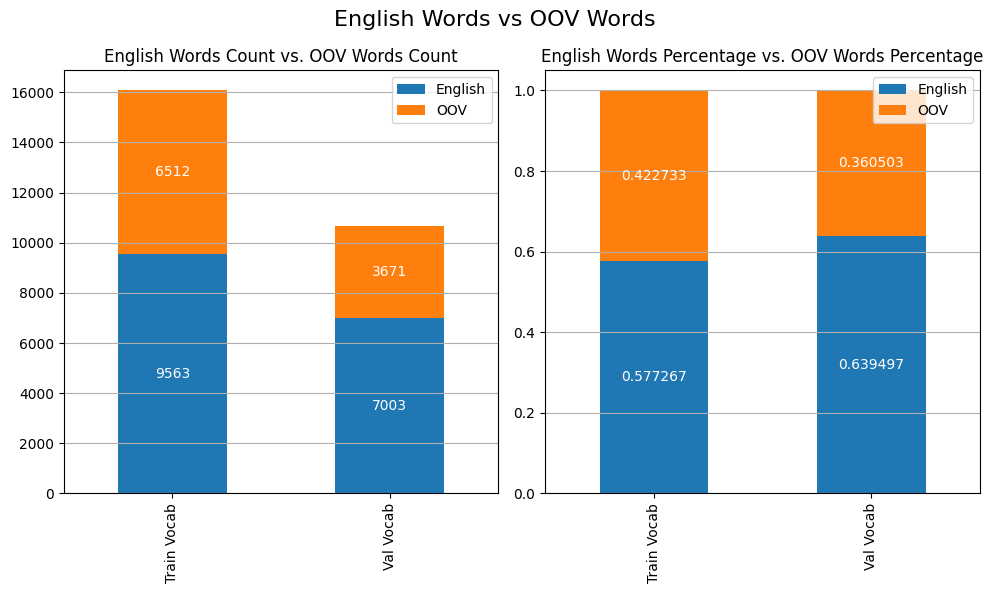

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

fig.suptitle("English Words vs OOV Words", fontsize=16)

df = pd.DataFrame(value_counts, index=labels1)
df.plot(kind='bar', stacked=True, figsize=(10, 6), width=width, ax=ax[0])
ax[0].set_title("English Words Count vs. OOV Words Count")
ax[0].legend(loc="upper right")
ax[0].grid(axis='y')

# Add count labels on each bar segment
for container in ax[0].containers:
    ax[0].bar_label(container, label_type='center', color='white', fontsize=10)

# Normalize the data: Divide each value by the sum of the column to get proportions
df = pd.DataFrame(percent_counts, index=labels2)
df_normalized = df.div(df.sum(axis=0), axis=1).T
df_normalized.plot(kind='bar', stacked=True, figsize=(10, 6), width=width, ax=ax[1])
ax[1].set_title("English Words Percentage vs. OOV Words Percentage")
ax[1].legend(loc="upper right")
ax[1].grid(axis='y')

# Add count labels on each bar segment
for container in ax[1].containers:
    ax[1].bar_label(container, label_type='center', color='white', fontsize=10)

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

**Conclusion:**

around ~16K unique words are there in train data and ~10k val data, from those only ~3.6K words are out-of-vocabulary this might cause some valalidation error but it will help us to get well generalized model

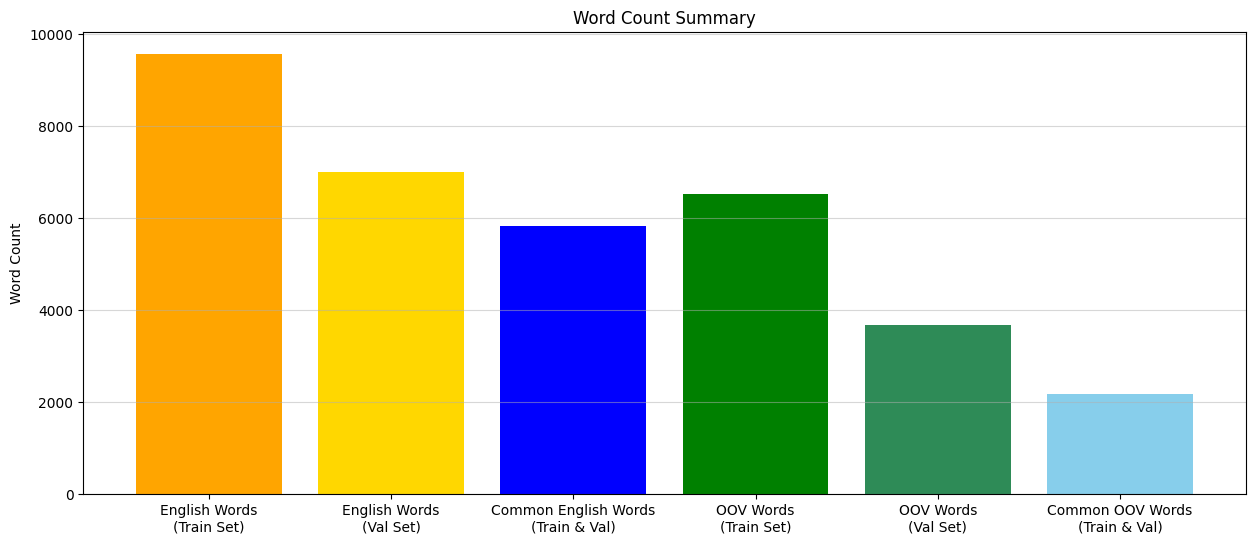

In [ ]:
# common english and oov words
num_shared_english_words = len(shared_words_english_words)
num_shared_oov_words = len(shared_words_non_english_words)

# Plot the results
labels = ['English Words\n(Train Set)', 'English Words\n(Val Set)', 'Common English Words\n(Train & Val)', 'OOV Words\n(Train Set)', 'OOV Words\n(Val Set)', 'Common OOV Words\n(Train & Val)']
values = [ num_words_in_train, num_words_in_val, num_shared_english_words, num_oov_words_in_train, num_oov_words_in_val, num_shared_oov_words]

plt.figure(figsize=(15, 6))
# plt.bar(labels, values, color=['blue', 'green', 'skyblue', 'seagreen'])
plt.bar(labels, values, color=[ 'orange', 'gold', 'blue', 'green', 'seagreen', 'skyblue'])
plt.title('Word Count Summary')
plt.ylabel('Word Count')
plt.grid(axis='y', alpha=0.5)
plt.show()

**Conclusion:**

- Train Vocabulary + Val Vocabulary = ~ 26K :
    - ~ 16K words + ~ 10K words

- Train Words : ~ 16K
    - ~10K english + ~6K oov

- Val Words : ~ 10K
    - ~6.5K english + ~3.5K oov

## Distribution Across each classDictionary Vs OOV words

In [17]:
classes = train_df["Category"].unique()

In [18]:
classes

array(['business', 'tech', 'politics', 'sport', 'entertainment'],
      dtype=object)

In [39]:
split = []
label = []
word_type = []
word_count = []

for category in classes:
    # train data
    print(f"Category: {category} -- Train")
    train_dummy_df = train_data[train_data["Category"] == category].copy()

    # get list of tokes
    train_dummy_words = []
    train_dummy_words = set([word for sentence in train_dummy_df["clean_text"] for word in sentence.split()])

    train_english_words = set()
    train_non_english_words = set()

    for word in tqdm(train_dummy_words, desc="Procesing"):
        if word in words.words():
            train_english_words.add(word)
        else:
            train_non_english_words.add(word)

    split.append("train")
    label.append(category)
    word_type.append("English")
    word_count.append(len(train_english_words))

    split.append("train")
    label.append(category)
    word_type.append("OOV")
    word_count.append(len(train_non_english_words))

    # # val data
    print(f"Category: {category} -- Validation")
    val_dummy_df = val_data[val_data["Category"] == category].copy()

    # # get list of tokes
    val_dummy_words = set([word for sentence in val_dummy_df["clean_text"] for word in sentence.split()])
    val_english_words = set()
    val_non_english_words = set()

    for word in tqdm(val_dummy_words, desc="Procesing"):
        if word in words.words():
            val_english_words.add(word)
        else:
            val_non_english_words.add(word)

    split.append("validation")
    label.append(category)
    word_type.append("English")
    word_count.append(len(val_english_words))

    split.append("validation")
    label.append(category)
    word_type.append("OOV")
    word_count.append(len(val_non_english_words))

Category: business -- Train


Procesing: 100%|██████████| 5896/5896 [02:40<00:00, 36.80it/s]


Category: business -- Validation


Procesing: 100%|██████████| 3820/3820 [01:42<00:00, 37.36it/s]


Category: tech -- Train


Procesing: 100%|██████████| 6224/6224 [02:49<00:00, 36.68it/s]


Category: tech -- Validation


Procesing: 100%|██████████| 4049/4049 [01:48<00:00, 37.40it/s]


Category: politics -- Train


Procesing: 100%|██████████| 5652/5652 [02:34<00:00, 36.67it/s]


Category: politics -- Validation


Procesing: 100%|██████████| 3836/3836 [01:43<00:00, 37.21it/s]


Category: sport -- Train


Procesing: 100%|██████████| 5919/5919 [02:39<00:00, 37.14it/s]


Category: sport -- Validation


Procesing: 100%|██████████| 3782/3782 [01:42<00:00, 36.98it/s]


Category: entertainment -- Train


Procesing: 100%|██████████| 6478/6478 [02:57<00:00, 36.41it/s]


Category: entertainment -- Validation


Procesing: 100%|██████████| 3830/3830 [01:46<00:00, 35.98it/s]


In [40]:
dfm = pd.DataFrame({
    "split": split,
    "category": label,
    "words type": word_type,
    "words count": word_count
})
dfm.head()

,split,category,words type,words count
0,train,business,English,4194
1,train,business,OOV,1702
2,validation,business,English,2956
3,validation,business,OOV,864
4,train,tech,English,4634


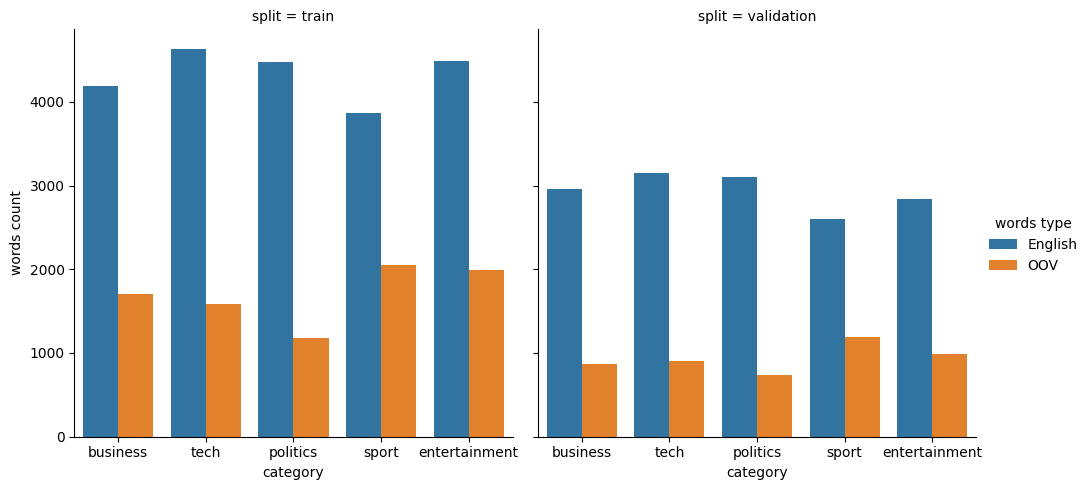

In [41]:
sns.catplot(x='category', y='words count', hue='words type', data=dfm, kind='bar', col="split",  height=5, aspect=1)

In [45]:
train_data[["clean_text", "token length", "Category", "Label"]].to_csv(os.path.join(DATA_PATH, "train_processed_data.csv"), index=False)
val_data[["clean_text", "token length", "Category", "Label"]].to_csv(os.path.join(DATA_PATH, "test_processed_data.csv"), index=False)

## N-Grams Overlap btewen Train and Val - to check data leakage in data

In [51]:
# #Gram analysis on Training set- Bigram and Trigram
# stopword=set(stopwords.words('english'))

# def gram_analysis(data,gram):
#     """ 
#     data (str) : string
#     gram (int) : n-grams as integer for provided text

#     returns:
#     final_tokens (list): list of n grams in list
#     """
#     tokens=[t for t in data.lower().split(" ") if t!="" if t not in stopword]
#     ngrams=zip(*[tokens[i:] for i in range(gram)])
#     final_tokens=[" ".join(z) for z in ngrams]
#     return final_tokens

# def get_common_n_grams(train_text, val_text, grams):
#     """ 
#     train_text (list): list of all train strings
#     val_text (list): list of all val data strings
#     grams (int): n-grams

#     returns:
#     common_grams (list): common n-gram list
#     """
#     try:
#         # Flatten the list of tokens (i.e., flatten the nested list of tokens)
#         train_words = [word for sentence in train_text for word in gram_analysis(sentence,grams)]
#         val_words = [word for sentence in val_text for word in gram_analysis(sentence,grams)]

#         # Create word count dictionaries (using Counter to count occurrences)
#         train_word_count = Counter(train_words)
#         val_word_count = Counter(val_words)

#         # Find the intersection of words (words that appear in both train and validation sets)
#         common_grams = set(train_word_count.keys()) & set(val_word_count.keys())

#         return common_grams
#     except Exception as e:
#         raise e

# #Create frequency grams for analysis
# def create_dict_of_common_n_grams(data, common_grams, grams):
#     """ 
#     data (list) : list of text data to process
#     common_grams (list) : list of common-n-grams
#     grams (int) : n-grams as integer
#     """
#     freq_dict=defaultdict(int)
#     for sentence in data:
#         for tokens in gram_analysis(sentence,grams):
#             if tokens in common_grams:
#                 freq_dict[tokens]+=1
#     return freq_dict

# def horizontal_bar_chart(df, color):
#     """ 
#     horizontal bar plot on provided data frame
#     """
#     trace = go.Bar(
#         y=df["n_gram_words"].values[::-1],
#         x=df["n_gram_frequency"].values[::-1],
#         showlegend=False,
#         orientation = 'h',
#         marker=dict(
#             color=color,
#         ),
#     )
#     return trace


# def create_new_df(freq_dict,):
#     freq_df=pd.DataFrame(sorted(freq_dict.items(),key=lambda z:z[1])[::-1])
#     freq_df.columns=['n_gram_words','n_gram_frequency']
#     #print(freq_df.head())
#     #plt.barh(freq_df['n_gram_words'][:20],freq_df['n_gram_frequency'][:20],linewidth=0.3)
#     #plt.show()
#     trace=horizontal_bar_chart(freq_df[:20],'orange')
#     return trace
    
# def plot_overlaping_grams(
#     train_data,
#     val_data,
#     grams
# ):
#     n = train_data["Category"].nunique()
#     # create subtitles
#     subplot_titles = []
#     for category in train_data["Category"].unique():
#         # subplot_titles.append(["Train Frequent words of "+category, f"Val Frequent words of "+category])
#         subplot_titles.append("Train Frequent words of "+category)
#         subplot_titles.append("Val Frequent words of "+category)

#     fig = tools.make_subplots(rows=n, cols=2, vertical_spacing=0.04,
#                           subplot_titles=subplot_titles
#                           )
#     for index, category in enumerate(train_data["Category"].unique()):
#         # isolate data
#         train_df_category=train_data[train_data['Category']==category]["clean_text"]
#         val_df_category=val_data[val_data['Category']==category]["clean_text"]
#         # get common n grams list
#         common_unigrams = get_common_n_grams(train_df_category, val_df_category, grams)
#         # calculate frequency
#         freq_train_df_category = create_new_df(create_dict_of_common_n_grams(train_df_category, common_unigrams, grams))
#         freq_val_df_category = create_new_df(create_dict_of_common_n_grams(val_df_category, common_unigrams, grams))

#         fig.append_trace(freq_train_df_category, index+1, 1)
#         fig.append_trace(freq_val_df_category, index+1, 2)

#     fig['layout'].update(height=2000, width=1200, paper_bgcolor='rgb(233,233,233)', title="n-Gram Word Count Plots")
#     py.iplot(fig, filename='word-plots')

In [207]:
#Gram analysis on Training set- Bigram and Trigram
stopword=set(stopwords.words('english'))

def gram_analysis(data, gram):
    """
    data (str) : string
    gram (int) : n-grams as integer for provided text

    returns:
    final_tokens (list): list of n grams in list
    """
    tokens=[t for t in data.lower().split(" ") if t!="" if t not in stopword]
    ngrams=zip(*[tokens[i:] for i in range(gram)])
    final_tokens=[" ".join(z) for z in ngrams]
    return final_tokens

def get_common_n_grams(train_text, val_text, grams):
    """
    train_text (list): list of all train strings
    val_text (list): list of all val data strings
    grams (int): n-grams

    returns:
    common_grams (list): common n-gram list
    """
    try:
        # Flatten the list of tokens (i.e., flatten the nested list of tokens)
        train_words = [word for sentence in train_text for word in gram_analysis(sentence,grams)]
        val_words = [word for sentence in val_text for word in gram_analysis(sentence,grams)]

        # Create word count dictionaries (using Counter to count occurrences)
        train_word_count = Counter(train_words)
        val_word_count = Counter(val_words)

        # Find the intersection of words (words that appear in both train and validation sets)
        common_grams = list(set(train_word_count.keys()) & set(val_word_count.keys()))

        return common_grams
    except Exception as e:
        raise e

# Create frequency grams for analysis
def create_dict_of_common_n_grams(data, common_grams, grams):
    """
    data (list) : list of text data to process
    common_grams (list) : list of common-n-grams
    grams (int) : n-grams as integer
    """
    freq_dict=defaultdict(int)
    for sentence in data:
        for tokens in gram_analysis(sentence,grams):
            if tokens in common_grams:
                freq_dict[tokens]+=1
    return freq_dict

def horizontal_bar_chart(df):
    """
    horizontal bar plot on provided data frame
    """
    trace = go.Figure(data=[
        go.Bar(name='Train', x=df["train_frequency"], y=df["n_gram_words"], orientation='h'),
        go.Bar(name='Val', x=df["val_frequency"], y=df["n_gram_words"], orientation='h')
    ])
    return trace

def create_new_df(train_freq_dict, val_freq_dict, common_ngrams):
    train_word_count = [train_freq_dict[word] for word in common_ngrams]
    val_word_count = [val_freq_dict[word] for word in common_ngrams]
    freq_df = pd.DataFrame({
        "n_gram_words": common_ngrams,
        "train_frequency": train_word_count,
        "val_frequency": val_word_count
    })
    # freq_df.sort_values(by="train_frequency", ascending=False, inplace=True)
    trace=horizontal_bar_chart(freq_df.sort_values(by="train_frequency", ascending=False)[:20])
    return trace

def plot_overlaping_grams(
    train_data,
    val_data,
    grams
):
    n = train_data["Category"].nunique()
    # create subtitles
    subplot_titles = []
    for category in train_data["Category"].unique():
        subplot_titles.append("Frequent words of "+category)

    fig = tools.make_subplots(rows=1, cols=n, vertical_spacing=0.04,
                          subplot_titles=subplot_titles
                          )
    for index, category in enumerate(train_data["Category"].unique()):
        # isolate data
        train_df_category=train_data[train_data['Category']==category]["clean_text"]
        val_df_category=val_data[val_data['Category']==category]["clean_text"]

        # get common n grams list
        common_ngrams = get_common_n_grams(train_df_category, val_df_category, grams)

        # calculate frequency
        train_freq_dict = create_dict_of_common_n_grams(train_df_category, common_ngrams, grams)
        val_freq_dict = create_dict_of_common_n_grams(val_df_category, common_ngrams, grams)

        freq_df_category = create_new_df(train_freq_dict, val_freq_dict, common_ngrams)

        # print(freq_df_category)
        # fig.add_trace(freq_df_category, row=1, col=index+1)
        
        # add the trace for each category to the subplot
        fig.add_trace(freq_df_category.data[0], row=1, col=index+1)
        fig.add_trace(freq_df_category.data[1], row=1, col=index+1)

    fig['layout'].update(height=1200, width=2000, paper_bgcolor='rgb(233,233,233)', title="n-Gram Word Count Plots")
    py.iplot(fig, filename='word-plots')

In [208]:
train_df["Category"].unique()

array(['business', 'tech', 'politics', 'sport', 'entertainment'],
      dtype=object)

### Unigram Overlap

In [209]:
plot_overlaping_grams(train_data, val_data, 1)

### Bi-gram Overlap

In [210]:
plot_overlaping_grams(train_data, val_data, 2)

### Tri-gram Overlap

In [211]:
plot_overlaping_grams(train_data, val_data, 3)

### Quad-gram Overlap

In [212]:
plot_overlaping_grams(train_data, val_data, 4)

### Penta-gram Overlap

In [213]:
plot_overlaping_grams(train_data, val_data, 5)

In [214]:
# train_data.shape

In [215]:
# val_data.shape

In [216]:
train_data.head()

,ArticleId,Text,Category,clean_text,Label,token length,count_punctuations,stop_words,no_of_urls
131,1361,call centre users lose patience customers tr...,business,call centre user lose patience customer try ge...,0,660,51,283,0
254,1681,europe asks asia for euro help european leader...,business,europe ask asia euro help european leader say ...,0,189,15,74,0
242,1012,making your office work for you our mission to...,business,make office work mission brighten work life co...,0,888,55,423,0
209,760,gm pays $2bn to evade fiat buyout general moto...,business,gm pay evade fiat buyout general motor u pay f...,0,391,41,158,0
1326,2164,asia shares defy post-quake gloom indonesian ...,business,asia share defy post quake gloom indonesian in...,0,507,47,202,0


In [217]:
# train_data[["clean_text", "Label"]].to_csv("data/train_data.csv", index=False)

In [218]:
val_data.head()

,ArticleId,Text,Category,clean_text,Label,token length,count_punctuations,stop_words,no_of_urls
703,756,us to rule on yukos refuge call yukos has said...,business,u rule yukos refuge call yukos say u bankruptc...,0,495,28,202,0
606,1268,watchdog probes vivendi bond sale french stock...,business,watchdog probe vivendi bond sale french stock ...,0,291,23,116,0
545,787,german jobless rate at new record more than 5....,business,german jobless rate new record million german ...,0,313,37,119,0
557,1076,news corp eyes video games market news corp t...,business,news corp eye video game market news corp medi...,0,303,30,112,0
705,747,air china in $1bn london listing china s natio...,business,air china london list china national airline m...,0,424,40,137,0


In [219]:
# val_data[["clean_text", "Label"]].to_csv("data/val_data.csv", index=False)